## Guided Grad-CAM Examples
- Tested Tensorflow version : '2.4.0-dev20201023'

- Code references:
    * https://keras.io/examples/vision/grad_cam/
    * https://colab.research.google.com/drive/17tAC7xx2IJxjK700bdaLatTVeDA02GJn?usp=sharing#scrollTo=jgTRCYgX4oz-
    

#### Import

In [1]:
from crispy.core.guided_grad_cam import make_gradcam_heatmap, build_guided_model, guided_backprop, guided_grad_cam, deprocess_image
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet import ResNet50, preprocess_input, decode_predictions
import urllib
import numpy as np
import matplotlib.pyplot as plt
import cv2

#### Set tensorflow gpu (optional for gpu user)

In [2]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


### Main part

In [3]:
url = 'https://raw.githubusercontent.com/nguyenhoa93/GradCAM_and_GuidedGradCAM_tf2/master/assets/samples/cat1.jpg'
dest = "./cat1.jpg"

urllib.request.urlretrieve(url, dest)

('./cat1.jpg', <http.client.HTTPMessage at 0x232eb42d588>)

In [4]:
H, W = 224, 224
def load_image(path, preprocess=True):
    """Load and preprocess image."""
    x = image.load_img(path, target_size=(H, W))
    if preprocess:
        x = image.img_to_array(x)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
    return x

In [5]:
# process example input
preprocessed_input = load_image("./cat1.jpg")

In [6]:
last_conv_layer_name = "conv5_block3_out"
classifier_layer_names = ["avg_pool", "predictions"]

In [7]:
res = keras.applications.resnet50.ResNet50(include_top = True, weights='imagenet')

In [8]:
gradcam_heatmap = make_gradcam_heatmap(preprocessed_input, res, last_conv_layer_name, classifier_layer_names)

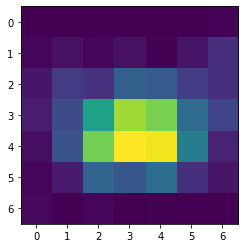

In [9]:
plt.imshow(gradcam_heatmap)

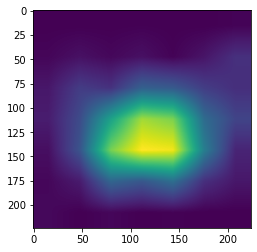

In [10]:
plt.imshow(cv2.resize(gradcam_heatmap, (224,224)))

In [11]:
guided_model = build_guided_model(res)

In [12]:
gb = guided_backprop(guided_model, preprocessed_input, last_conv_layer_name)

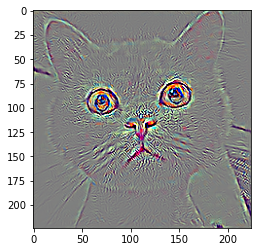

In [13]:
plt.imshow(np.flip(deprocess_image(gb), -1))

In [14]:
ggc = deprocess_image(
        guided_grad_cam(gb, gradcam_heatmap)
        )

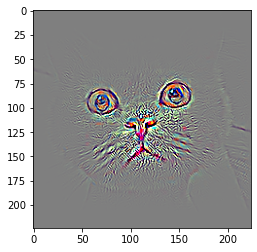

In [15]:
plt.imshow(np.flip(ggc, -1))